## Pre / Post Designs

Pre / Post designs are common designs in the social sciences and beyond. These types of designs are such that two measurement occasions are collected for each person in the study. Typically, the pre-measurement occasion occurs before a treatment and then the post-measurement occasions occurs after the treatment has happened. This gives a glimpse to whether the treatment impacts the a specific outcome. 

Below are a few scenarios that could be studied with a pre / post design. 

+ Does a new drug reduce blood pressure in those with high blood pressure?
+ Does a yoga regimine reduce pain in those that have fibromyalgia?
+ Does professional development increase knowledge related to acceleration options for students?
+ Does a finance workshop improve financial health and wealth of individuals?

Each of these could be conducted so that two measurement occasions could be used. First, the measurement before the treatment would be collected, then the treatment is given, then the post-measurement could explore if the treatment is effective. This is a type of **within** study design that is popular because each individual acts as its own control group. They are also easier to implement than longitudinal studies that would collect more than 2 measurement occasions. 

### Analyzing Pre / Post Designs

There are more than one way to analyze pre/post designs. These are largely derived from the research questions and also a statistical consideration related to balance. Let's first think about the research questions. 

There first class of research questions talk about **change**. For example, using the scenarios above, how much does the drug lower blood pressure or how much does the financial workshop improve financial health? 

The second class of research questions talk about what is the average post score after adjusting for pre scores. This is inherently a conditional mean problem whereas the previous example is an unconditional problem. For example, using the scenarios above, do those with the same initial blood pressure have different blood pressure levels at follow-up? 

## Example

We are going to use simulated data based on a real study. The study is:

Kathryn Curtis, Anna Osadchuk & Joel Katz (2011) An eight-week yoga
intervention is associated with improvements in pain, psychological functioning and
mindfulness, and changes in cortisol levels in women with fibromyalgia, Journal of Pain
Research, , 189-201, DOI: 10.2147/JPR.S22761

For this analysis we are going to focus on pain as a single outcome. The study itself had many different outcomes that they explored the impact of the 8-week yoga intervention. I'm also simplifying the study's actual design (they collected survey measurements at 3 time points). I am going to focus the data simulation from a self-report measure of 11 items named the Pain Disability Index. This measure quantifies the extent to which an individual's pain impacts seven daily activities. 

Table 3 of the paper contains the means and standard deviations for the outcome that we will use for the simulation. Most notably, the mean PDI score for the group before the yoga intervention was 38.14 (SD was 17.17) and follow up was 33.81 (14.43). This resulted in a reductino in the self-report measure of pain of 4.33. 

In [43]:
library(tidyverse)
library(ggformula)
library(mosaic)
library(simglm)

theme_set(theme_bw(base_size = 16))

sim_args <- list(
    formula = PDI ~ PDI_pre,
    fixed = list(
        PDI_pre = list(var_type = 'continuous', 
        mean = 0, sd = 17.17, floor = -38.14, ceiling = 31.86)
    ),
    error = list(variance = 150),
    sample_size = 50,
    reg_weights = c(-4.33, -0.5)
)

pain_data <- simulate_fixed(data = NULL, sim_args) |> 
  simulate_error(sim_args) |>
  generate_response(sim_args)

head(pain_data)

,X.Intercept.,PDI_pre,level1_id,error,fixed_outcome,random_effects,PDI
,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,"<dbl[,1]>"
1,1,12.016951,1,11.601758,-10.338476,0,1.263282
2,1,-21.057669,2,8.100397,6.198835,0,14.299232
3,1,-15.143275,3,31.723056,3.241638,0,34.964694
4,1,-1.782738,4,-1.406719,-3.438631,0,-4.845350
5,1,-15.294004,5,19.584851,3.317002,0,22.901852
6,1,19.156923,6,-1.275422,-13.908461,0,-15.183884


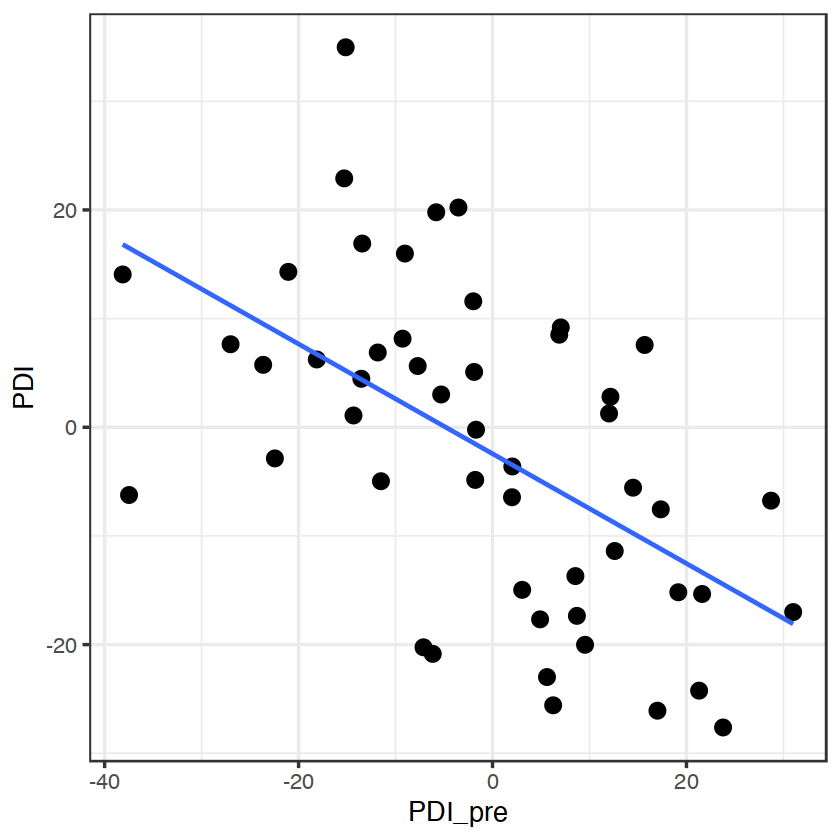

In [44]:
gf_point(PDI ~ PDI_pre, data = pain_data, size = 4) |>
   gf_smooth(method = 'lm')

In [45]:
df_stats(~ PDI, data = pain_data, mean, sd, min, max)
df_stats(~ PDI_pre, data = pain_data, mean, sd, min, max)
cor(PDI ~ PDI_pre, data = pain_data)

response,mean,sd,min,max
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
PDI,-2.106608,14.71631,-27.62714,34.96469


response,mean,sd,min,max
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
PDI_pre,-0.6559304,16.09755,-38.14,31.00571


-0.5524352


### Two competing models

There are two competing models here that are often described in the literature. As discussed above, one is performed on the **change** scores, the other is done via statistical control. These two models are shown below for the simplest design with pre / post measurement occasions for a single group.

#### Change Scores

$$
Post - Pre = \beta_{0} + \epsilon
$$


#### ANCOVA

$$
Post = \beta_{0} + \beta_{1} Pre + \epsilon
$$

For both models, the term of interest is $\beta_{0}$. This term would represent the average change score for the change score model and would represent the average post score after adjusting for the pre score respectively. 

In [46]:
summary(
    lm(I(PDI - PDI_pre) ~ 1, data = pain_data)
    )


Call:
lm(formula = I(PDI - PDI_pre) ~ 1, data = pain_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-49.951 -22.188   0.658  20.812  53.652 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)   -1.451      3.840  -0.378    0.707

Residual standard error: 27.16 on 49 degrees of freedom


In [47]:
pain_data <- pain_data |> 
   mutate(change = PDI - PDI_pre)

t.test(pain_data$change)


	One Sample t-test

data:  pain_data$change
t = -0.37774, df = 49, p-value = 0.7073
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -9.168288  6.266932
sample estimates:
mean of x 
-1.450678 


In [50]:
summary(
    lm(PDI ~ PDI_pre, data = pain_data)
    )



Call:
lm(formula = PDI ~ PDI_pre, data = pain_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-22.7276  -9.9773  -0.3091   8.9705  29.7547 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -2.438      1.754  -1.390    0.171    
PDI_pre       -0.505      0.110  -4.592 3.19e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 12.39 on 48 degrees of freedom
Multiple R-squared:  0.3052,	Adjusted R-squared:  0.2907 
F-statistic: 21.08 on 1 and 48 DF,  p-value: 3.189e-05


### Iterate both models multiple times

These are one instance of simulated data. We can perform this process many times to get a sense as to how much variation there are in these estimates as well as typical values for the parameter of interest. Again, I'm going to use the **simglm** package to do this automatically. The code is not really that interesting here, unless you are interesting in learning R code. We will focus on the ideas from the output. 

In [51]:
library(future)
plan(multisession)

sim_args <- list(
    formula = PDI ~ PDI_pre,
    fixed = list(
        PDI_pre = list(var_type = 'continuous', 
        mean = 0, sd = 17.17, floor = -38.14, ceiling = 31.86)
    ),
    error = list(variance = 150),
    sample_size = 50,
    reg_weights = c(-4.33, -0.5), 
    replications = 1000
)

pain_data_repl <- replicate_simulation(sim_args)


Attaching package: 'future'


The following object is masked from 'package:mosaic':

    value




In [52]:
change_mod <- lapply(seq_along(pain_data_repl), function(xx) 
  broom::tidy(lm(I(PDI - PDI_pre) ~ 1, data = pain_data_repl[[xx]]))) |> 
  dplyr::bind_rows() |> 
  dplyr::mutate(model = 'change')

ancova_mod <- lapply(seq_along(pain_data_repl), function(xx) 
  broom::tidy(lm(PDI ~ PDI_pre, data = pain_data_repl[[xx]]))) |> 
  dplyr::bind_rows() |> 
  dplyr::mutate(model = 'ancova')

combine_data <- dplyr::bind_rows(
    change_mod,
    ancova_mod
)

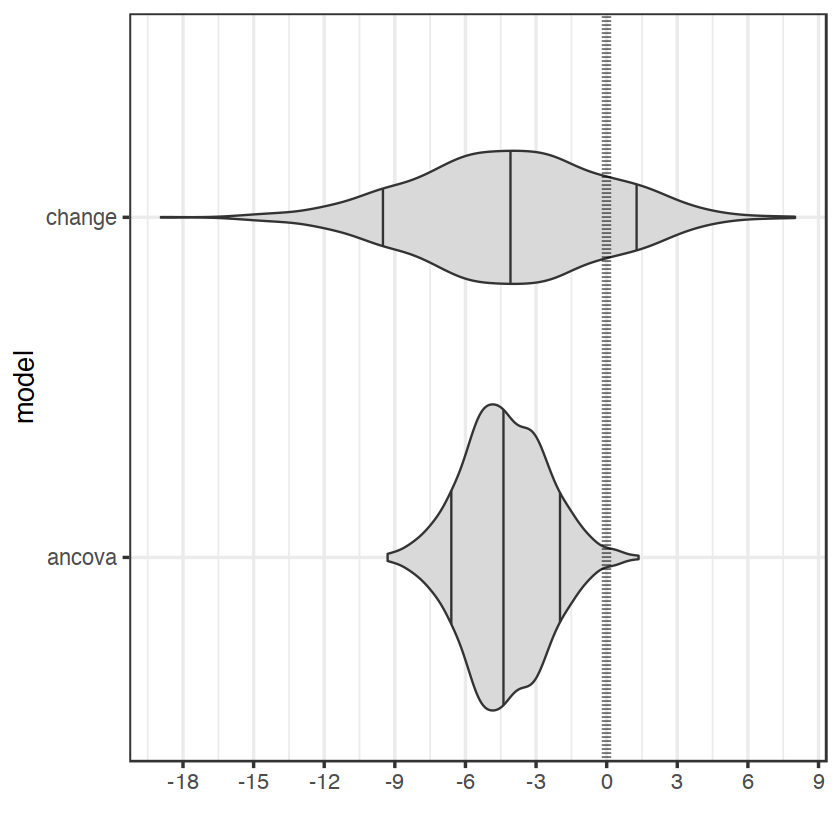

In [54]:
combine_data |> 
  dplyr::filter(term == '(Intercept)') |> 
  dplyr::mutate(term2 = 'Intercept') |> 
  gf_violin(model ~ estimate, fill = 'grey85', draw_quantiles = c(0.1, 0.5, 0.9)) |> 
  gf_refine(scale_x_continuous("", breaks = seq(-18, 9, 3))) |> 
  gf_vline(xintercept = 0, linewidth = 2, linetype = 'dotted')

## Increase strength of design

A rather simple adjustment to the above design (not done in the original study) is to add a control group. The control group would not receive the treatment/intervention, but the same measurements would occur for those groups. This removes the counterfactual of having time pass. For example, adding the control group helps to answer the question about what would occur without any treatment just with the passage of time.

Having a control group does not automatically give a causal type research design. The key for those types of considerations is really in how the control group was selected. If it was done via random assignment, then this would be a causal type design due to the balanced nature of the control and treatment/intervention group at baseline or pre measurement. If random assignment was not done, then causal type claims can not be made. 

### Analysis of pre / post design with control group

Unlike above when there was no control group, the choice of ANCOVA and change scores can provide different results. Much of the difference is due to whether the control and treatment/intervention group are balanced at baseline. If random assignment was done and the groups are balanced (similar characteristics at baseline), then both ANCOVA and change scores should give similar results. However, if random assignment was not performed, then it is likely that there is sampling bias and the control and treatment/intervention groups would likely be non-equivalent at baseline. This would then need to be adjusted via ANCOVA. For example, if one group has a higher mean at baseline, this could mean they could be more likely to have bigger change, have regression to the mean, or be close to the ceiling for the measure. 

#### Change Scores

$$
Post - Pre = \beta_{0} + \beta_{2} treat + \epsilon
$$


#### ANCOVA

$$
Post = \beta_{0} + \beta_{1} Pre + \beta_{2} treat + \epsilon
$$

For both models, the term of interest is $\beta_{2}$. This term would represent the average treatment effect.

In [55]:
sim_args <- list(
    formula = PDI ~ PDI_pre + treatment,
    fixed = list(
        PDI_pre = list(var_type = 'continuous', 
        mean = 0, sd = 17.17, floor = -38.14, ceiling = 31.86),
        treatment = list(var_type = 'factor', 
        levels = c('control', 'treatment'))
    ),
    error = list(variance = 150),
    sample_size = 50,
    reg_weights = c(0, -0.5, -10)
)

pain_data <- simulate_fixed(data = NULL, sim_args) |> 
  simulate_error(sim_args) |>
  generate_response(sim_args)

head(pain_data)

,X.Intercept.,PDI_pre,treatment_1,treatment,level1_id,error,fixed_outcome,random_effects,PDI
,<dbl>,<dbl>,<dbl>,<fct>,<int>,<dbl>,<dbl>,<dbl>,"<dbl[,1]>"
1,1,-13.627014,1,treatment,1,6.94158250,-3.186493,0,3.7550893
2,1,26.517725,0,control,2,-0.79171140,-13.258862,0,-14.0505737
3,1,6.951518,1,treatment,3,-21.08870303,-13.475759,0,-34.5644622
4,1,10.751987,1,treatment,4,-14.42883039,-15.375993,0,-29.8048239
5,1,-11.857164,1,treatment,5,4.90541570,-4.071418,0,0.8339976
6,1,-3.333423,0,control,6,-0.04716362,1.666712,0,1.6195480


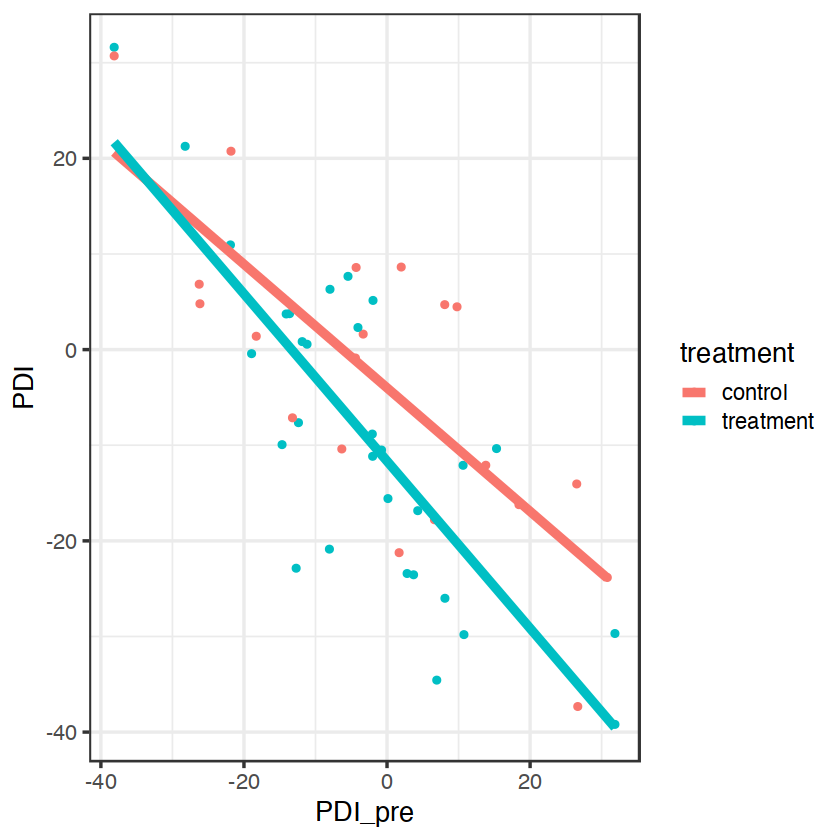

In [56]:
gf_point(PDI ~ PDI_pre, data = pain_data, color = ~ treatment) |>
  gf_smooth(method = 'lm', linewidth = 2) 

In [57]:
df_stats(PDI ~ treatment, data = pain_data, mean, sd, min, max, length)
df_stats(PDI_pre ~ treatment, data = pain_data, mean, sd, min, max, length)

response,treatment,mean,sd,min,max,length
<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
PDI,control,-3.422538,16.05706,-37.32287,30.70997,20
PDI,treatment,-8.640255,16.58707,-39.19405,31.61323,30


response,treatment,mean,sd,min,max,length
<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
PDI_pre,control,-0.8938222,19.18109,-38.14,30.79104,20
PDI_pre,treatment,-3.4546729,15.25046,-38.14,31.86000,30


In [58]:
summary(lm(PDI ~ PDI_pre + treatment, data = pain_data))


Call:
lm(formula = PDI ~ PDI_pre + treatment, data = pain_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-21.234  -8.893   1.367   8.037  15.993 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -4.10021    2.30359  -1.780   0.0816 .  
PDI_pre            -0.75817    0.08785  -8.630 2.97e-11 ***
treatmenttreatment -7.15928    2.98069  -2.402   0.0203 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 10.3 on 47 degrees of freedom
Multiple R-squared:  0.6227,	Adjusted R-squared:  0.6066 
F-statistic: 38.78 on 2 and 47 DF,  p-value: 1.129e-10


In [59]:
summary(lm(I(PDI - PDI_pre) ~ treatment, data = pain_data))


Call:
lm(formula = I(PDI - PDI_pre) ~ treatment, data = pain_data)

Residuals:
   Min     1Q Median     3Q    Max 
-65.87 -20.89  -1.19  18.19  74.94 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)
(Intercept)          -2.529      7.030  -0.360    0.721
treatmenttreatment   -2.657      9.075  -0.293    0.771

Residual standard error: 31.44 on 48 degrees of freedom
Multiple R-squared:  0.001782,	Adjusted R-squared:  -0.01901 
F-statistic: 0.08571 on 1 and 48 DF,  p-value: 0.771


### Iterate

Again, let's look at any differences by performing the simulation multiple times. 

In [60]:
library(future)
plan(multicore)

sim_args <- list(
    formula = PDI ~ PDI_pre + treatment,
    fixed = list(
        PDI_pre = list(var_type = 'continuous', 
            mean = 0, sd = 17.17, floor = -38.14, ceiling = 31.86),
        treatment = list(var_type = 'factor', 
            levels = c('control', 'treatment'))
    ),
    error = list(variance = 150),
    sample_size = 50,
    reg_weights = c(0, -0.5, -10),
    replications = 1000
)

pain_data_repl <- replicate_simulation(sim_args)

change_mod <- lapply(seq_along(pain_data_repl), function(xx) 
  broom::tidy(lm(I(PDI - PDI_pre) ~ 1 + treatment, data = pain_data_repl[[xx]]))) |> 
  dplyr::bind_rows() |> 
  dplyr::mutate(model = 'change')

ancova_mod <- lapply(seq_along(pain_data_repl), function(xx) 
  broom::tidy(lm(PDI ~ PDI_pre + treatment, data = pain_data_repl[[xx]]))) |> 
  dplyr::bind_rows() |> 
  dplyr::mutate(model = 'ancova')

combine_data <- dplyr::bind_rows(
    change_mod,
    ancova_mod
)

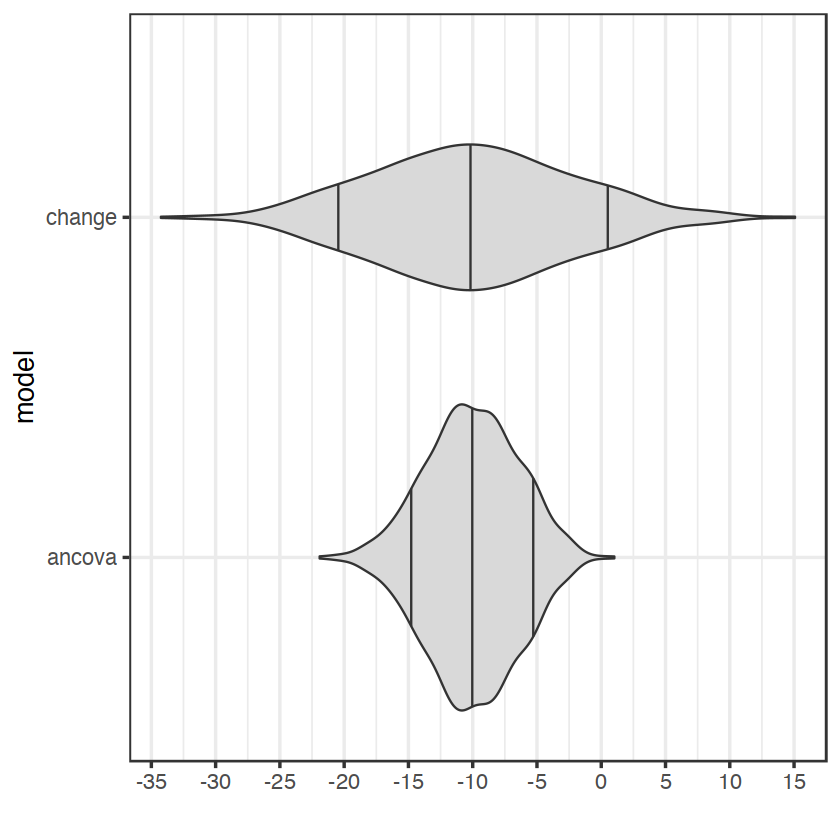

In [61]:
combine_data |> 
  dplyr::filter(term == 'treatment') |>
  gf_violin(model ~ estimate, fill = 'grey85', draw_quantiles = c(0.1, 0.5, 0.9)) |> 
  gf_refine(scale_x_continuous("", breaks = seq(-40, 20, 5)))

### Non-equivalent control groups

What happens if the control group is not equivalent to the treatment group? One way this can be simulated is to have the treatment allocation not be random, but instead have the treatment allocation be dependent on the pre test score. 

In [ ]:
sim_args <- list(
    formula = PDI ~ PDI_pre + treatment,
    fixed = list(
        PDI_pre = list(var_type = 'continuous', 
        mean = 0, sd = 17.17, floor = -38.14, ceiling = 31.86),
        treatment = list(var_type = 'ordinal', 
        levels = c(0:1))
    ),
    error = list(variance = 150),
    sample_size = 50,
    reg_weights = c(0, -0.5, -10),
    correlate = list(fixed = data.frame(x = c('PDI_pre'), 
                                        y = c('treatment'), 
                                        corr = c(0.6)))
)

pain_data <- simulate_fixed(data = NULL, sim_args) |> 
  correlate_variables(sim_args) |>
  simulate_error(sim_args) |>
  generate_response(sim_args)

head(pain_data)

In [ ]:
df_stats(PDI_pre ~ treatment, data = pain_data, mean, median, sd, length)

In [ ]:
summary(lm(PDI ~ PDI_pre + treatment, data = pain_data))

In [ ]:
summary(lm(I(PDI - PDI_pre) ~ treatment, data = pain_data))

In [ ]:
library(future)
plan(multicore)

sim_args <- list(
    formula = PDI ~ PDI_pre + treatment,
    fixed = list(
        PDI_pre = list(var_type = 'continuous', 
        mean = 0, sd = 17.17, floor = -38.14, ceiling = 31.86),
        treatment = list(var_type = 'ordinal', 
        levels = c(0:1))
    ),
    error = list(variance = 150),
    sample_size = 50,
    reg_weights = c(0, -0.5, -10),
    correlate = list(fixed = data.frame(x = c('PDI_pre'), 
                                        y = c('treatment'), 
                                        corr = c(0.6))),
    replications = 1000
)

pain_data_repl <- replicate_simulation(sim_args)

change_mod <- lapply(seq_along(pain_data_repl), function(xx) 
  broom::tidy(lm(I(PDI - PDI_pre) ~ 1 + treatment, data = pain_data_repl[[xx]]))) |> 
  dplyr::bind_rows() |> 
  dplyr::mutate(model = 'change')

ancova_mod <- lapply(seq_along(pain_data_repl), function(xx) 
  broom::tidy(lm(PDI ~ PDI_pre + treatment, data = pain_data_repl[[xx]]))) |> 
  dplyr::bind_rows() |> 
  dplyr::mutate(model = 'ancova')

combine_data <- dplyr::bind_rows(
    change_mod,
    ancova_mod
)

In [ ]:
combine_data |> 
    dplyr::filter(term == 'treatment') |>
    gf_violin(model ~ estimate, fill = 'grey85', draw_quantiles = c(0.1, 0.5, 0.9)) |> 
    gf_refine(scale_x_continuous("", breaks = seq(-55, 5, 5)))

In [ ]:
library(future)
plan(multicore)

sim_args <- list(
    formula = PDI ~ PDI_pre + treatment,
    fixed = list(
        PDI_pre = list(var_type = 'continuous', 
        mean = 0, sd = 17.17, floor = -38.14, ceiling = 31.86),
        treatment = list(var_type = 'ordinal', 
        levels = c(0:1))
    ),
    error = list(variance = 150),
    sample_size = 50,
    reg_weights = c(0, -0.5, -10),
    correlate = list(fixed = data.frame(x = c('PDI_pre'), 
                                        y = c('treatment'), 
                                        corr = c(-0.4))),
    replications = 1000
)

pain_data_repl <- replicate_simulation(sim_args)

change_mod <- lapply(seq_along(pain_data_repl), function(xx) 
  broom::tidy(lm(I(PDI - PDI_pre) ~ 1 + treatment, data = pain_data_repl[[xx]]))) |> 
  dplyr::bind_rows() |> 
  dplyr::mutate(model = 'change')

ancova_mod <- lapply(seq_along(pain_data_repl), function(xx) 
  broom::tidy(lm(PDI ~ PDI_pre + treatment, data = pain_data_repl[[xx]]))) |> 
  dplyr::bind_rows() |> 
  dplyr::mutate(model = 'ancova')

combine_data <- dplyr::bind_rows(
    change_mod,
    ancova_mod
)

combine_data |> 
    dplyr::filter(term == 'treatment') |>
    gf_violin(model ~ estimate, fill = 'grey85', draw_quantiles = c(0.1, 0.5, 0.9)) |> 
    gf_refine(scale_x_continuous("", breaks = seq(-35, 45, 5)))